**A Recurrent Neural Network (RNN)** is a type of neural network designed to recognize patterns in sequences of data, such as time series, speech, text, or video. Unlike traditional feedforward neural networks, **RNNs have connections that form directed cycles**, allowing them to maintain a memory of previous inputs.  

This "memory" enables RNNs to capture temporal dependencies and relationships within the data, making them particularly useful for tasks involving sequences.

**USES:**  
- Time Series Prediction: Forecasting future values in time series data, such as stock prices, weather data, or energy consumption.
- Natural Language Processing (NLP): Tasks like text generation, machine translation, sentiment analysis, and speech recognition, where understanding the context and sequence of words is crucial.
- Speech Recognition: Converting spoken language into text by understanding the sequence of sounds over time.
- Video Analysis: Analyzing sequences of video frames for applications like activity recognition, object tracking, or video captioning.
- Music Generation: Creating new music by learning patterns from sequences of notes or chords.

**Key Elements of RNNs** 
- Recurrent Connections:
    - RNNs have connections that loop back to previous layers or the same layer, allowing the network to maintain a hidden state that captures information from previous inputs.
    - At each time step, the network updates its hidden state based on the current input and the previous hidden state, enabling it to remember and use information from past inputs.
- Hidden State:
    - The hidden state acts as the network’s memory, storing information about the sequence seen so far.
    - The hidden state is updated at each time step, allowing the network to keep track of temporal dependencies in the data.
- Activation Functions:
    - RNNs use activation functions like Tanh or ReLU to introduce non-linearity, enabling the network to learn complex patterns.
    - Tanh is often used in RNNs to keep the values of the hidden state within a certain range, preventing it from growing too large.
- Vanishing and Exploding Gradient Problems:

    - Challenges: During training, RNNs can suffer from vanishing or exploding gradients, where gradients become too small or too large, making it difficult to update the weights properly.
    - Solutions: Variants like Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) were developed to mitigate these issues by adding gates that control the flow of information.
- Output Layer:

    - The final layer of an RNN processes the hidden state and produces an output, which could be a prediction, classification, or the next element in a sequence.
    - The output can be a single value, a sequence of values, or a probability distribution, depending on the task.

**Problem Description**  
The problem we are solving with this model is time series prediction applied to sunspot data. Sunspots are temporary areas on the sun's surface that appear darker than their surroundings due to magnetic activity. This data is important because sunspots have a direct impact on solar activity, which in turn can influence space weather and technology on Earth, such as satellite communications.

The goal of the model is to predict the number of sunspots in the future using past sequences of data. We use a Recurrent Neural Network (RNN) for this task, as RNNs are particularly well-suited for capturing temporal patterns and long-term dependencies in time series data.



In [3]:
pip install pandas-datareader


^C
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\egzlz\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [16]:
df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [22]:
import pandas as pd
from pandas_datareader import data as pdr
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url, header=0)

# Extracting the sunspot data
original_sunspots = df['Sunspots'].values

# Normalizing the data
sunspots = (original_sunspots - original_sunspots.min()) / (original_sunspots.max() - original_sunspots.min())

In [21]:
sunspots.max()

1.0

Epoch 1/20
71/71 [==============================] - 13s 41ms/step - loss: 0.0102 - val_loss: 0.0059
Epoch 2/20
71/71 [==============================] - 1s 16ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 3/20
71/71 [==============================] - 1s 15ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 4/20
71/71 [==============================] - 1s 14ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 5/20
71/71 [==============================] - 1s 16ms/step - loss: 0.0035 - val_loss: 0.0058
Epoch 6/20
71/71 [==============================] - 1s 15ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 7/20
71/71 [==============================] - 1s 16ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 8/20
71/71 [==============================] - 1s 16ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 9/20
71/71 [==============================] - 1s 15ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 10/20
71/71 [==============================] - 1s 16ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 11

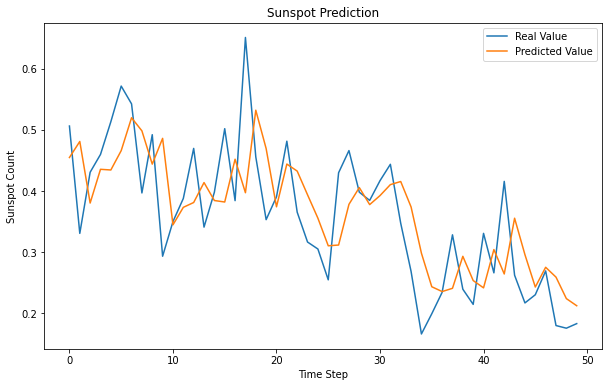

1/1 [==============================] - 0s 163ms/step
Actual Value: 0.49
Predicted Value: 0.53


In [6]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data)-time_steps-1):
        X.append(data[i:(i+time_steps)])
        Y.append(data[i + time_steps])
    return np.array(X), np.array(Y)

time_steps = 10
X, Y = create_dataset(sunspots, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Y_pred = model.predict(X_test)

Y_pred = Y_pred * (np.max(sunspots) - np.min(sunspots)) + np.min(sunspots)
Y_test = Y_test * (np.max(sunspots) - np.min(sunspots)) + np.min(sunspots)

Y_pred_binary = np.where(Y_pred > np.mean(Y_pred), 1, 0)
Y_test_binary = np.where(Y_test > np.mean(Y_test), 1, 0)

# Mostrar el reporte de clasificación
print("Classification Report:\n")
print(classification_report(Y_test_binary, Y_pred_binary))

# Matriz de confusión
print("Confusion Matrix:\n")
print(confusion_matrix(Y_test_binary, Y_pred_binary))

# Visualización de una predicción
plt.figure(figsize=(10, 6))
plt.plot(Y_test[:50], label='Real Value')
plt.plot(Y_pred[:50], label='Predicted Value')
plt.title('Sunspot Prediction')
plt.xlabel('Time Step')
plt.ylabel('Sunspot Count')
plt.legend()
plt.show()

# Ejemplo de predicción individual
random_idx = np.random.randint(0, len(X_test))
sample = X_test[random_idx]

predicted_value = model.predict(np.expand_dims(sample, axis=0))
predicted_value = predicted_value[0][0] * (np.max(sunspots) - np.min(sunspots)) + np.min(sunspots)
actual_value = Y_test[random_idx]

print(f"Actual Value: {actual_value:.2f}")
print(f"Predicted Value: {predicted_value:.2f}")

In [18]:
predicted_relative_value

array([[0.52855986]], dtype=float32)

In [19]:
sunspots.max()

1.0

In [23]:
 predicted_relative_value = model.predict(np.expand_dims(sample, axis=0))
predicted_relative_value[0][0]  * (original_sunspots.max() - original_sunspots.min()) + original_sunspots.min()


1/1 [==============================] - 0s 178ms/step


134.14849337339402

In [24]:
original_value=Y_test[random_idx] * (original_sunspots.max() - original_sunspots.min()) + original_sunspots.min()
original_value


125.0

In [7]:
print("\nClassification Report:\n")
print(classification_report(Y_test_binary, Y_pred_binary))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       299
           1       0.91      0.93      0.92       263

    accuracy                           0.93       562
   macro avg       0.93      0.93      0.93       562
weighted avg       0.93      0.93      0.93       562

